# Milestone 1
---

## Introduction

Name  : Izzatur Arrasya 002<br>

## Dataset Introduction
<b>Bank Marketing Data Set</b> <br>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Objective

In this notebook of Milestone 1 was created to evaluate concept as follows:

1. Able to understand the concept of supervised learning
2. Able to prepare data for use in supervised learning model
3. Able to implement supervised learning to make predictions
4. Able to evaluated the model
5. Able to tuning the model

and I will try to predicted subscribed a term deposit based on the features or variables available in this dataset

## Import Library
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import auc 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


## Data Loading
---

In [2]:
#load data using pandas
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

From the data above, we get some of information of every column in data frame :

1. Column 'age' : Age 
2. Column 'job' : type of job
3. Column 'marital' : marital status 
4. Column 'education' : education status
5. Column 'default' : has credit in default?
6. Column 'housing' : has housing loan?
7. Column 'loan' : has personal loan?
8. Column 'contact' : contact communication type
9. Column 'month' :last contact month of year
10. Column 'day_of_week' : last contact day of the week
11. Column 'duration' : last contact duration, in seconds
12. Column 'campaign' : number of contacts performed during this campaign and for this client
13. Column 'pdays' : number of days that passed by after the client was last contacted from a previous campaign
14. Column 'previous' : number of contacts performed before this campaign and for this client
15. Column 'poutcome': outcome of the previous marketing campaign
16. Column 'emp.var.rate' : employment variation rate - quarterly indicator
17. Column 'cons.price.idx' : consumer price index - monthly indicator
18. Column 'cons.conf.idx' : consumer confidence index - monthly indicator
19. Column 'euribor3m' : euribor 3 month rate - daily indicator
20. Column 'nr.employed' : number of employees - quarterly indicator

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.shape

(41188, 21)

## Data Cleaning
---

copy the dataframe so we have the original version of dataset as a backup if the work got messy

In [7]:
#copy dataframe
df_bm = df.copy()

In [8]:
#check any missing value
df_bm.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
#checking any duplicate row
df_bm.duplicated().sum()

12

In [10]:
#dropping duplicated rows
df_bm.drop_duplicates(keep=False, inplace=True)

In [11]:
#rechecking any duplicate row
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41164 non-null  int64  
 1   job             41164 non-null  object 
 2   marital         41164 non-null  object 
 3   education       41164 non-null  object 
 4   default         41164 non-null  object 
 5   housing         41164 non-null  object 
 6   loan            41164 non-null  object 
 7   contact         41164 non-null  object 
 8   month           41164 non-null  object 
 9   day_of_week     41164 non-null  object 
 10  duration        41164 non-null  int64  
 11  campaign        41164 non-null  int64  
 12  pdays           41164 non-null  int64  
 13  previous        41164 non-null  int64  
 14  poutcome        41164 non-null  object 
 15  emp.var.rate    41164 non-null  float64
 16  cons.price.idx  41164 non-null  float64
 17  cons.conf.idx   41164 non-null 

## Data Exploration Analysis
---

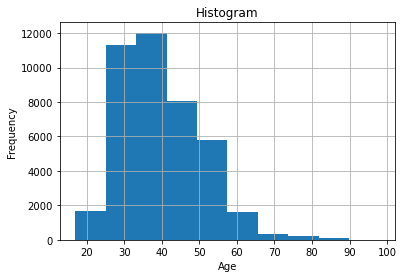

In [12]:
# Age distribution
df_bm.age.hist()
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution')

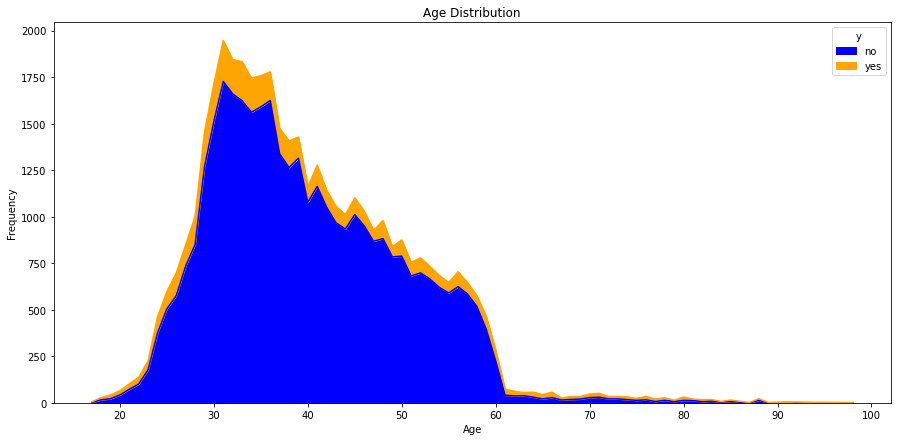

In [13]:
pd.crosstab(df_bm.age,df_bm.y).plot(kind="area",figsize=(15,7),color=['blue','orange' ])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

many of client at 24 - 60 years old had deposit

<AxesSubplot:xlabel='education', ylabel='count'>

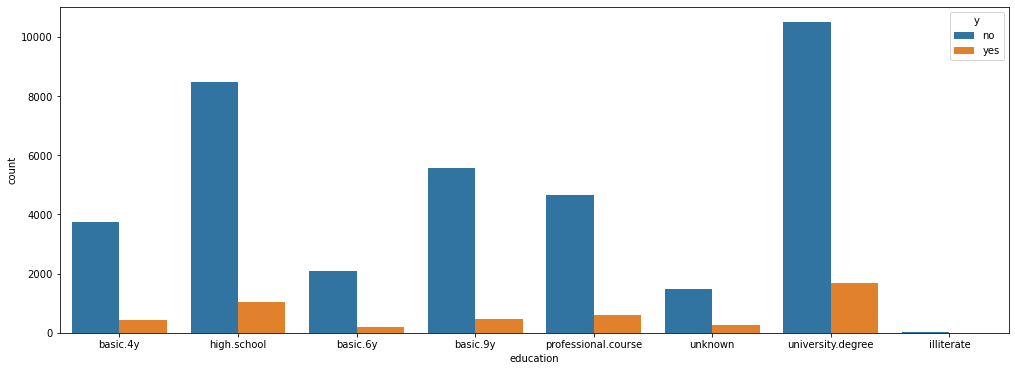

In [14]:
plt.figure(figsize = (17, 6))
sns.countplot('education', hue = 'y', data = df_bm)

<AxesSubplot:xlabel='job', ylabel='count'>

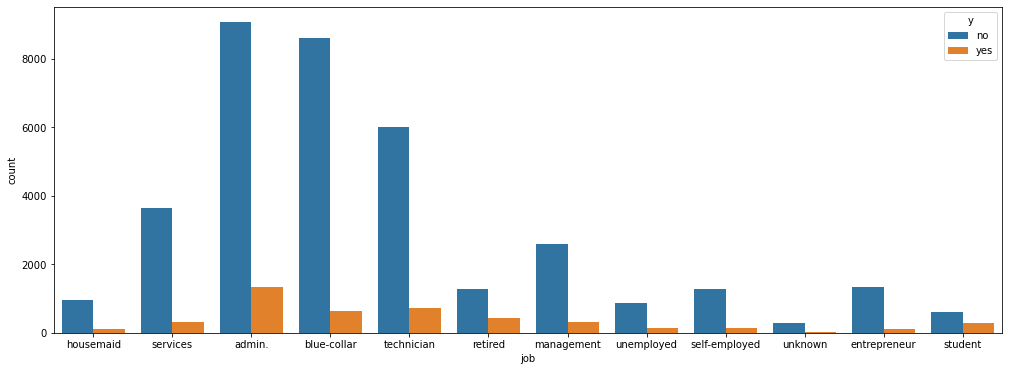

In [15]:
plt.figure(figsize = (17, 6))
sns.countplot('job', hue = 'y', data = df_bm)

<AxesSubplot:xlabel='loan', ylabel='count'>

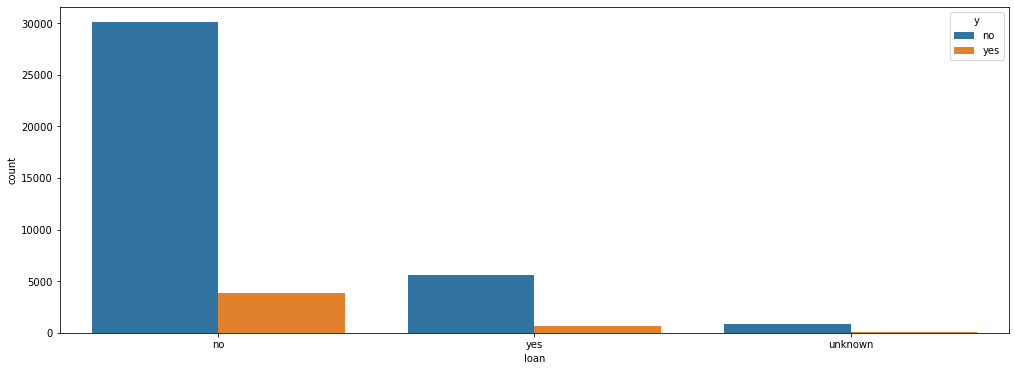

In [16]:
plt.figure(figsize = (17, 6))
sns.countplot('loan', hue = 'y', data = df_bm)

<AxesSubplot:xlabel='housing', ylabel='count'>

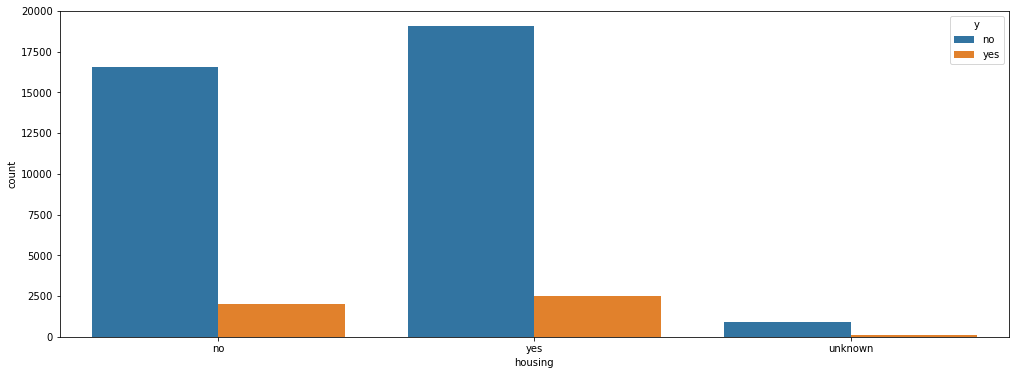

In [17]:
plt.figure(figsize = (17, 6))
sns.countplot('housing', hue = 'y', data = df_bm)

## Data Preprocessing
---

In [18]:
# Columns to be dropped
to_drop = ['duration']
df_drop = df.drop(to_drop, axis=1)

# Verifyng
print(f'Shape before the drop: {df.shape}')
print(f'Shape after the drop: {df_drop.shape}')
df_drop.head()

Shape before the drop: (41188, 21)
Shape after the drop: (41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
# Numeric columns
df_numeric = df_bm.select_dtypes(exclude="object")
print(df_numeric.columns)
print("")


#Categorical columns
df_categoric = df_bm.select_dtypes(include="object")
print(df_categoric.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [20]:
# Splitting the data
X = df_bm.drop('y', axis=1)
y = df_bm['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (32931, 20)
Shape of X_test: (8233, 20)


In [21]:
# Returing features by dtype
num_features = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']
cat_features = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']
print(f'Total of numerical features: {len(num_features)}')
print(f'Total of categorical features: {len(cat_features)}')

# Splitting data by dtype
X_train_num = X_train[num_features]
X_train_cat = X_train[cat_features]
print(f'\nShape of numerical training data: {X_train_num.shape}')
print(f'Shape of categorical training data: {X_train_cat.shape}')

Total of numerical features: 10
Total of categorical features: 10

Shape of numerical training data: (32931, 10)
Shape of categorical training data: (32931, 10)


In [22]:
# Class for splitting the data by dtype
class SplitDataDtype(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Returing features by dtype
        self.num_features = [col for col, dtype in X.dtypes.items() if dtype != 'object']
        self.cat_features = [col for col, dtype in X.dtypes.items() if dtype == 'object']
        
        # Indexing data
        X_num = X[self.num_features]
        X_cat = X[self.cat_features]
        
        return X_num, X_cat

In [23]:
# Creating object and calling the fit_transform method
dtype_splitter = SplitDataDtype()
X_train_num, X_train_cat = dtype_splitter.fit_transform(X_train)

print(f'Shape of numerical training data: {X_train_num.shape}')
print(f'Shape of categorical training data: {X_train_cat.shape}')

Shape of numerical training data: (32931, 10)
Shape of categorical training data: (32931, 10)


### Categorical Pipeline

In [24]:
# Class for encoding the data
class DummiesEncoding(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Collecting variables
        self.cat_features_ori = [col for col, dtype in X.dtypes.items() if dtype == 'object']
        
        # Applying encoding with get_dummies()
        X_cat_dum = pd.get_dummies(X)
        
        # Merging the datasets and eliminating old columns
        X_dum = X.join(X_cat_dum)
        X_dum = X_dum.drop(self.cat_features_ori, axis=1)
        self.features_after_encoding = list(X_dum.columns)
        
        return X_dum

In [25]:
# Applying encoding on categorical data
encoder = DummiesEncoding()
X_train_encoded = encoder.fit_transform(X_train_cat)

print(f'Shape of X_train_encoded: {X_train_encoded.shape}')
X_train_encoded.head()

Shape of X_train_encoded: (32931, 53)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
6100,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
6254,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
13796,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
39317,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14296,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Numerical Pipeline

In [26]:
# Scaling with StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)

X_train_scaled[0]

array([-0.28641585, -0.01317826,  4.79528163,  0.19572469, -0.35173876,
        0.64686482,  0.72131718,  0.8924455 ,  0.71133935,  0.32899511])

### Full Pipeline

In [27]:
dtype_spliter = SplitDataDtype()
X_num, X_cat = dtype_spliter.fit_transform(X_train)
num_features = dtype_spliter.num_features
cat_features = dtype_spliter.cat_features

# Numerical pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding())
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Applying the complete pipeline on the training set
X_train_prep = full_pipeline.fit_transform(X_train)

# Returning features
cat_features_encoded = full_pipeline.named_transformers_['cat']['encoder'].features_after_encoding
model_features = num_features + cat_features_encoded

In [28]:
# Result
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_train_prep: {X_train_prep.shape}')
print(f'Total features: {len(model_features)}')
print(f'\nFirst line of X_train_prep: \n\n{X_train_prep[0]}')

Shape of X_train: (32931, 20)
Shape of X_train_prep: (32931, 63)
Total features: 63

First line of X_train_prep: 

[-0.28641585 -0.01317826  4.79528163  0.19572469 -0.35173876  0.64686482
  0.72131718  0.8924455   0.71133935  0.32899511  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          1.          0.
  0.          1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.        ]


In [29]:
# Applying the same pipeline for the test set
X_test_prep = full_pipeline.fit_transform(X_test)

print(f'Shape of X_test_prep: {X_test_prep.shape}')

Shape of X_test_prep: (8233, 63)


In [30]:
# Saving everything on a prepared set to feed some homemade classes

set_prep = {
    'X_train_prep': X_train_prep,
    'X_test_prep': X_test_prep,
    'y_train': y_train,
    'y_test': y_test
}

## Modelling
---

### Logistic Regression

In [38]:
t0 = time.time()
logreg=LogisticRegression()
logreg.fit(X_train_prep,y_train)
print('# Logistic Regression Models Results\n')
print('Training Score: ',logreg.score(X_train_prep, y_train))
print('Accuracy Score: ', accuracy_score(y_test,logreg.predict(X_test_prep)))
print('Time taken :' , time.time()-t0)

# Logistic Regression Models Results

Training Score:  0.9129088093285962
Accuracy Score:  0.9073241831653104
Time taken : 0.5089986324310303


### Support Vector Machines

In [39]:
t0 = time.time()
SVM=SVC()
SVM.fit(X_train_prep,y_train)
print('# Support Vector Machines Models Results\n')
print('Training Score: ',SVM.score(X_train_prep, y_train))
print('Accuracy Score: ', accuracy_score(y_test,SVM.predict(X_test_prep)))
print('Time taken :' , time.time()-t0)

# Support Vector Machines Models Results

Training Score:  0.9230815948498375
Accuracy Score:  0.9064739463136159
Time taken : 52.24464559555054


### Decision Tree Classifier

In [41]:
t0 = time.time()
Decision_tree=DecisionTreeClassifier()
Decision_tree.fit(X_train_prep,y_train)
print("\n # Decision Tree Classifier Model Results\n")
print('Training Score: ',Decision_tree.score(X_train_prep,y_train))
print('Testing Score: ',accuracy_score(y_test,Decision_tree.predict(X_test_prep)))
print('Time taken :' , time.time()-t0)


 # Decision Tree Classifier Model Results

Training Score:  1.0
Testing Score:  0.8824243896514029
Time taken : 0.35500025749206543


### Random Forest

In [36]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train_prep,y_train)
print("\n # Random Forest Classifier Model Results\n")
print('Training Score: ',rf_classifier.score(X_train_prep,y_train))
print('Testing Score: ',accuracy_score(y_test,rf_classifier.predict(X_test_prep)))
print('Time taken :' , time.time()-t0)


 # Random Forest Classifier Model Results

Training Score:  1.0
Testing Score:  0.9084173448317746
Time taken : 194.00823378562927


### K Nearest neigbors

In [42]:
t0 = time.time()
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train_prep,y_train)
print("\n # KNN Classifier Model Results\n")
print('Training Score: ',knn_classifier.score(X_train_prep,y_train))
print('Testing Score: ',accuracy_score(y_test,rf_classifier.predict(X_test_prep)))
print('Time taken :' , time.time()-t0)


 # KNN Classifier Model Results

Training Score:  0.9282135373963742
Testing Score:  0.9084173448317746
Time taken : 25.786948680877686


### Naive Bayes

In [43]:
t0 = time.time()
naba=GaussianNB()
naba.fit(X_train_prep,y_train)
print("\n # Naive Bays Model Results\n")
print('Training Score: ',naba.score(X_train_prep,y_train))
print('Testing Score: ',accuracy_score(y_test,rf_classifier.predict(X_test_prep)))
print('Time taken :' , time.time()-t0)


 # Naive Bays Model Results

Training Score:  0.8200176125838875
Testing Score:  0.9084173448317746
Time taken : 0.3890705108642578


### XG Boost

In [44]:
t0 = time.time()
xgb=XGBClassifier()
xgb.fit(X_train_prep,y_train)
print("\n # XG Boost Model Results\n")
print('Training Score: ',xgb.score(X_train_prep,y_train))
print('Testing Score: ',accuracy_score(y_test,rf_classifier.predict(X_test_prep)))
print('Time taken :' , time.time()-t0)

[09:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 # XG Boost Model Results

Training Score:  0.9598250888220825
Testing Score:  0.9084173448317746
Time taken : 2.2331717014312744


## Cross Validation & Grid Search

### Logistic Regression

In [45]:
t0 = time.time()

# Using CV 
logreg=LogisticRegression()
logreg.fit(X_train_prep,y_train)
log_scores=cross_val_score(logreg,X_train_prep,y_train,cv=5)
print("Accuracy score using CV",log_scores.mean())

# Now use hyperparameters
log_reg_params={'penalty':['l1','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_prep, y_train)
log_reg_best=grid_log_reg.best_estimator_
accuray_score=cross_val_score(log_reg_best,X_train_prep,y_train,cv=5)
print("Accuracy score using hyperparameters and CV: ",accuray_score.mean())

print('Time taken :' , time.time()-t0)

Accuracy score using CV 0.9113903878342857
Accuracy score using hyperparameters and CV:  0.9116029369059255
Time taken : 16.889630556106567


### Support Vector Machines

In [46]:
t0 = time.time()

# Using CV 
SVM=SVC()
SVM.fit(X_train_prep,y_train)
SVM_scores=cross_val_score(SVM,X_train_prep,y_train,cv=5)
print("Accuracy score using CV",SVM_scores.mean())

print('Time taken :' , time.time()-t0)

Accuracy score using CV 0.9115421651320587
Time taken : 100.45474934577942


### Decision Tree Classifier

In [47]:
t0 = time.time()

# Using CV 
Decision_tree=DecisionTreeClassifier()
Decision_tree.fit(X_train_prep,y_train)
dt_score=cross_val_score(Decision_tree,X_train_prep,y_train,cv=5)
print("Accuray using CV: ",dt_score.mean())

# Now use hyperparameters
dec_tree_parms={"criterion":['gini','entropy'],'max_depth': np.arange(1,10,1),'min_samples_leaf':np.arange(1,10,1) }
Grid_decision_tree=GridSearchCV(DecisionTreeClassifier(),dec_tree_parms)
Grid_decision_tree.fit(X_train_prep,y_train)
Decision_tree_best=Grid_decision_tree.best_estimator_
Grid_dt_score=cross_val_score(Decision_tree_best,X_train_prep,y_train,cv=5)
print("Accuracy score using hyperparameters and CV: ",Grid_dt_score.mean())

print('Time taken :' , time.time()-t0)

Accuray using CV:  0.8913789323871832
Accuracy score using hyperparameters and CV:  0.9148522305873439
Time taken : 104.74014329910278


### Random Forest

In [48]:
t0 = time.time()

# USing CV 
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train_prep,y_train)
rf_score=cross_val_score(rf_classifier,X_train_prep,y_train,cv=5)
print("Accuray using CV: ",rf_score.mean())

print('Time taken :' , time.time()-t0)

Accuray using CV:  0.9139412302554548
Time taken : 16.70098876953125


### K Nearest Neighbors

In [49]:
t0 = time.time()

# Using CV 
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train_prep,y_train)
knn_score=cross_val_score(knn_classifier,X_train_prep,y_train,cv=5)
print("Accuracy score using CV: ", knn_score.mean())

# Now use hyperparameters
knn_parms={'n_neighbors':np.arange(1,5,1),'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid_clf=GridSearchCV(knn_classifier,knn_parms,cv=5)
knn_grid_clf.fit(X_train_prep,y_train)
print(knn_grid_clf.best_estimator_)
knn_grid_best_score=cross_val_score(knn_grid_clf.best_estimator_,X_train_prep,y_train)
print("Accuracy score using hyperparmeters and CV: ", knn_grid_best_score.mean())

print('Time taken :' , time.time()-t0)

Accuracy score using CV:  0.9026751889759209
KNeighborsClassifier(n_neighbors=4)
Accuracy score using hyperparmeters and CV:  0.9014605971668145
Time taken : 955.9576115608215


### Naive Bayes

In [50]:
t0 = time.time()

# Using CV 
naba=GaussianNB()
naba.fit(X_train_prep,y_train)
naba_score=cross_val_score(naba,X_train_prep,y_train,cv=5)
print("Accuracy score using CV: ", naba_score.mean())

print('Time taken :' , time.time()-t0)

Accuracy score using CV:  0.826243157816072
Time taken : 0.6270406246185303


### XG Boost

In [51]:
t0 = time.time()

# Using CV 
xgb=XGBClassifier()
xgb.fit(X_train_prep,y_train)
xgb_score=cross_val_score(xgb,X_train_prep,y_train,cv=5)
print("Accuracy score using CV: ", xgb_score.mean())

print('Time taken :' , time.time()-t0)

[09:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Model Evaluation
---

In [52]:
# Taking the best score resulted from experiments

scores={"Model":["Logistic Regression","SVM","Decision Tree","Random Forest","KNN","Naive Bayes","XGB"],
       "Accuracy scores":[log_scores.mean(),SVM_scores.mean(),Grid_dt_score.mean(),rf_score.mean(),knn_score.mean(),naba_score.mean(),xgb_score.mean()]}

scores_df=pd.DataFrame(data=scores)
scores_df

,Model,Accuracy scores
0,Logistic Regression,0.911390
1,SVM,0.911542
2,Decision Tree,0.914852
3,Random Forest,0.913941
4,KNN,0.902675
5,Naive Bayes,0.826243
6,XGB,0.913425


XGB has the highest accuracy amongst all models, followed by Decision Tree, Random Forest, SVM, Logistic Regression, KNN, and Naive Bayes

### Logistic regression

In [53]:
t0 = time.time()
models= ['Logistic Regression: ',LogisticRegression()],

for name,model in models:
    model = model
    model.fit(X_train_prep,y_train)
    print(name)
    print('Logistic Regression Model Accuracy: ',accuracy_score(y_test,model.predict(X_test_prep)))
    print('Logistic Regression Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test_prep)))
    print('Logistic Regression Model Classification Report: ',classification_report(y_test,model.predict(X_test_prep)))
    print('Time taken :' , time.time()-t0)

Logistic Regression: 
Logistic Regression Model Accuracy:  0.9073241831653104
Logistic Regression Model Confusion Matrix:  [[7079  183]
 [ 580  391]]
Logistic Regression Model Classification Report:                precision    recall  f1-score   support

          no       0.92      0.97      0.95      7262
         yes       0.68      0.40      0.51       971

    accuracy                           0.91      8233
   macro avg       0.80      0.69      0.73      8233
weighted avg       0.90      0.91      0.90      8233

Time taken : 0.628596305847168


### Support Vector Machines

In [54]:
t0 = time.time()
models= ['SVM: ',SVC()],

for name,model in models:
    model = model
    model.fit(X_train_prep,y_train)
    print(name)
    print('SVM Model Accuracy: ',accuracy_score(y_test,model.predict(X_test_prep)))
    print('SVM Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test_prep)))
    print('SVM Model Classification Report: ',classification_report(y_test,model.predict(X_test_prep)))
    print('Time taken :' , time.time()-t0)

SVM: 
SVM Model Accuracy:  0.9064739463136159
SVM Model Confusion Matrix:  [[7090  172]
 [ 598  373]]
SVM Model Classification Report:                precision    recall  f1-score   support

          no       0.92      0.98      0.95      7262
         yes       0.68      0.38      0.49       971

    accuracy                           0.91      8233
   macro avg       0.80      0.68      0.72      8233
weighted avg       0.89      0.91      0.89      8233

Time taken : 33.54287505149841


### Decision Tree

In [55]:
t0 = time.time()
models= ['Decision tree: ',DecisionTreeClassifier()],

for name,model in models:
    model = model
    model.fit(X_train_prep,y_train)
    print(name)
    print('Decision tree Model Accuracy: ',accuracy_score(y_test,model.predict(X_test_prep)))
    print('Decision tree Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test_prep)))
    print('Decision tree Model Classification Report: ',classification_report(y_test,model.predict(X_test_prep)))
    print('Time taken :' , time.time()-t0)

Decision tree: 
Decision tree Model Accuracy:  0.8854609498360257
Decision tree Model Confusion Matrix:  [[6822  440]
 [ 503  468]]
Decision tree Model Classification Report:                precision    recall  f1-score   support

          no       0.93      0.94      0.94      7262
         yes       0.52      0.48      0.50       971

    accuracy                           0.89      8233
   macro avg       0.72      0.71      0.72      8233
weighted avg       0.88      0.89      0.88      8233

Time taken : 0.5370297431945801


### Random Forest

In [56]:
t0 = time.time()
models= ['Random Forest: ',RandomForestClassifier()],

for name,model in models:
    model = model
    model.fit(X_train_prep,y_train)
    print(name)
    print('Random Forest Model Accuracy: ',accuracy_score(y_test,model.predict(X_test_prep)))
    print('Random Forest Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test_prep)))
    print('Random Forest Model Classification Report: ',classification_report(y_test,model.predict(X_test_prep)))
    print('Time taken :' , time.time()-t0)

Random Forest: 
Random Forest Model Accuracy:  0.9087817320539293
Random Forest Model Confusion Matrix:  [[7071  191]
 [ 560  411]]
Random Forest Model Classification Report:                precision    recall  f1-score   support

          no       0.93      0.97      0.95      7262
         yes       0.68      0.42      0.52       971

    accuracy                           0.91      8233
   macro avg       0.80      0.70      0.74      8233
weighted avg       0.90      0.91      0.90      8233

Time taken : 3.5929975509643555


### K Nearest Neighbors

In [57]:
t0 = time.time()
models= ['KNN: ',KNeighborsClassifier()],

for name,model in models:
    model = model
    model.fit(X_train_prep,y_train)
    print(name)
    print('KNN Model Accuracy: ',accuracy_score(y_test,model.predict(X_test_prep)))
    print('KNN Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test_prep)))
    print('KNN Model Classification Report: ',classification_report(y_test,model.predict(X_test_prep)))
    print('Time taken :' , time.time()-t0)

KNN: 
KNN Model Accuracy:  0.8982145026114418
KNN Model Confusion Matrix:  [[6997  265]
 [ 573  398]]
KNN Model Classification Report:                precision    recall  f1-score   support

          no       0.92      0.96      0.94      7262
         yes       0.60      0.41      0.49       971

    accuracy                           0.90      8233
   macro avg       0.76      0.69      0.72      8233
weighted avg       0.89      0.90      0.89      8233

Time taken : 17.583504676818848


### Naive Bayes

In [58]:
t0 = time.time()
models= ['Naive Bayes: ',GaussianNB()],

for name,model in models:
    model = model
    model.fit(X_train_prep,y_train)
    print(name)
    print('Naive Bayes Model Accuracy: ',accuracy_score(y_test,model.predict(X_test_prep)))
    print('Naive Bayes Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test_prep)))
    print('Naive BayesModel Classification Report: ',classification_report(y_test,model.predict(X_test_prep)))
    print('Time taken :' , time.time()-t0)

Naive Bayes: 
Naive Bayes Model Accuracy:  0.8238795092918741
Naive Bayes Model Confusion Matrix:  [[6148 1114]
 [ 336  635]]
Naive BayesModel Classification Report:                precision    recall  f1-score   support

          no       0.95      0.85      0.89      7262
         yes       0.36      0.65      0.47       971

    accuracy                           0.82      8233
   macro avg       0.66      0.75      0.68      8233
weighted avg       0.88      0.82      0.84      8233

Time taken : 0.4139573574066162


### XG Boost

In [59]:
t0 = time.time()
models= ['XGB: ',XGBClassifier()],

for name,model in models:
    model = model
    model.fit(X_train_prep,y_train)
    print(name)
    print('XGBModel Accuracy: ',accuracy_score(y_test,model.predict(X_test_prep)))
    print('XGB Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test_prep)))
    print('XGB Model Classification Report: ',classification_report(y_test,model.predict(X_test_prep)))
    print('Time taken :' , time.time()-t0)

[09:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 
XGBModel Accuracy:  0.9087817320539293
XGB Model Confusion Matrix:  [[7008  254]
 [ 497  474]]
XGB Model Classification Report:                precision    recall  f1-score   support

          no       0.93      0.97      0.95      7262
         yes       0.65      0.49      0.56       971

    accuracy                           0.91      8233
   macro avg       0.79      0.73      0.75      8233
weighted avg       0.90      0.91      0.90      8233

Time taken : 2.3725054264068604


## Model Inference
---

In [100]:
#Data Sample
sampledf= df.sample(n=100)
sampledf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17321,46,admin.,married,high.school,unknown,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
26868,29,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,2,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no
28531,67,retired,married,professional.course,no,no,no,telephone,apr,wed,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,no
37964,47,admin.,married,university.degree,no,no,no,cellular,sep,fri,...,3,999,1,failure,-3.4,92.379,-29.8,0.803,5017.5,no
16327,41,blue-collar,divorced,unknown,no,yes,no,telephone,jul,tue,...,11,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [101]:
#defining X
y_sample = sampledf['y'].values
X_sample = sampledf.drop(columns=['y'],axis=1).values

## Conclusion
---

the conclusion of this notebook from my work:

1. There are 12 duplicate data, which will then be removed from the dataset
2. From a total of 41188 observation data, there are 4639 data where clients are willing to open deposits or 11.26%
3. many of client at 24 - 60 years old had deposit
4. Most of the clients who are willing to open a deposit have a job as an admin
5. Most of the clients who are willing to open a deposit have a university degree
6. XGB (91.34%) has the highest accuracy amongst all models, followed by Decision Tree(91.48%), Random Forest(91.17%), SVM(91.15%), Logistic Regression(91.38%), KNN(90.26%), and Naive Bayes(82.62%)